# Stock Advisor

A simple to use notebook to help you stay informed on stock trends. Object implimentation is at the beginning: examples follow.

In [1]:
#Import lots of stuff
import heapq
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
from statistics import mode
from scipy import stats
from scipy.stats import anderson
from scipy.stats import shapiro

#our data stream script
import DataDownload as dd
dataStream = dd.gitHubData()

#trying new plotting library
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

/Users/Razander/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#class getData:
#    def __init__(self, ticker, start, end): #executed when an sma object in created
#        self.ticker = ticker   #must be all caps string (e.g. "MSFT")
#        self.startDate = start #must be datetime.datetime(yyyy,mm,dd)
#        self.endDate = end     #must be datetime.datetime(yyyy,mm,dd)
#        
#        # Check for valid inputs
#        
#        if len(self.ticker) < 1: #check for valid ticker
#            print("\nInvalid ticker: length is less than 1 character\n")
#        
#        if(type(end) != datetime.datetime or type(start) != datetime.datetime): #check dates are correct object
#            print("\nInvalid date start and/or end object(s): datetime.datetime(yyyy,mm,dd) required for start and end dates\n")
#        
#        if start>end: #check end is after start
#            print("\nInvalid dates: start date is after end date\n")
#        
#        # Import stock data using pandasreader
#        self.df = pdr.get_data_quandl(self.ticker, start=self.startDate, end=self.endDate)
#        self.df = self.df.reindex(index=self.df.index[::-1]) #flip index so 0th row is oldest date
#    
#    def getDf(self):
#        return self.df
#    
#    def viewDFhead(self):
#        return self.df.head()
#        
#    def viewDFtail(self):
#        return self.df.tail()
#    
#    def plotDF(self):
#        #iteractive bokeh plot
#        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
#        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
#        p.line(self.df.index.values,self.df['Close'])
#       show(p)
#        
#        #matplotlib version (not interactive)
#        self.df['Close'].plot(grid=True,figsize=(12,8))
#        plt.title(ticker)
#        plt.ylabel('Price $')
#        plt.show()

## The simple moving average object
Simple moving average analysis of stocks. Best for trending markets (not sidways/violate markets)

This is a Simple Moving Crossover Trading Strategy (Momentum class of strategies)
The code comes from part of the tutorial form this website:
https://www.datacamp.com/community/tutorials/finance-python-trading#tradingstrategy


In [3]:
class sma:
    def __init__(self, df, ticker): #executed when an sma object in created
        self.df = df   #import dataframe
        self.ticker = ticker
        
    def createSMA(self, window): #Calculate SMA for given window_size
        self.window = window
        
        # Initialize the signals DataFrame
        self.signals = pd.DataFrame(index=self.df.index)
        self.signals['signal'] = 0.0

        # Create short simple moving average over the short window
        self.signals['mavg'] = self.df['Close'].rolling(window=self.window, min_periods=1, center=False).mean()
        
    def viewDFhead(self):
        return self.df.head()
        
    def viewDFtail(self):
        return self.df.tail()
    
    def getDF(self):
        return self.df

    def getSMA(self):
        return self.signals
    
    def plotDF(self):
        #iteractive bokeh plot
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'])
        show(p)
        
        #matplotlib version (not interactive)
        self.df['Close'].plot(grid=True,figsize=(12,8))
        plt.title(ticker)
        plt.ylabel('Price $')
        plt.show()
        
    def plotSMA(self): #plot price with SMA short and long windows. For now, buy sell signals are not included
        fig = plt.figure()
        ax1 = fig.add_subplot(111, ylabel='Price in $')
        self.df['Close'].plot(ax=ax1, color='r', lw=2.)
        self.signals[['mavg']].plot(ax=ax1, lw=2.)
        plt.show()
        
        # Bohek plot (interactive)
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'],color = 'red',legend='Close')
        p.line(self.df.index.values,self.signals['mavg'], color='green',legend=str(self.window))
        p.legend.click_policy="hide"
        show(p)

In [4]:
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = dataStream.getData(ticker,start,end)
#df = getData(ticker,start,end).getDf()
df.head()

Unnamed: 0  Unnamed: 0.1        Date        Open        High        Low  \
3315        3315          3315  2016-01-11   98.970001   99.059998  97.339996   
3316        3316          3316  2016-01-12  100.550003  100.690002  98.839996   
3317        3317          3317  2016-01-13  100.320000  101.190002  97.300003   
3318        3318          3318  2016-01-14   97.959999  100.480003  95.739998   
3319        3319          3319  2016-01-15   96.199997   97.709999  95.360001   

          Close  Adj Close    Volume  
3315  98.529999  93.783073  49739400  
3316  99.959999  95.144165  49154200  
3317  97.389999  92.697990  62439600  
3318  99.519997  94.725372  63170100  
3319  97.129997  92.450516  79010000

In [5]:
sma1 = sma(df,ticker)
sma1.getDF()
#sma1.plotDF() #redirects to new page

Unnamed: 0  Unnamed: 0.1        Date        Open        High  \
3315        3315          3315  2016-01-11   98.970001   99.059998   
3316        3316          3316  2016-01-12  100.550003  100.690002   
3317        3317          3317  2016-01-13  100.320000  101.190002   
3318        3318          3318  2016-01-14   97.959999  100.480003   
3319        3319          3319  2016-01-15   96.199997   97.709999   
3320        3320          3320  2016-01-19   98.410004   98.650002   
3321        3321          3321  2016-01-20   95.099998   98.190002   
3322        3322          3322  2016-01-21   97.059998   97.879997   
3323        3323          3323  2016-01-22   98.629997  101.459999   
3324        3324          3324  2016-01-25  101.519997  101.529999   
3325        3325          3325  2016-01-26   99.930000  100.879997   
3326        3326          3326  2016-01-27   96.040001   96.629997   
3327        3327          3327  2016-01-28   93.790001   94.519997   
3328        3328          3328  2016-01-29   94.790001   97.339996   
3329        3329          3329  2016-02-01   96.470001   96.709999   
3330        3330          3330  2016-02-02   95.419998   96.040001   
3331        3331          3331  2016-02-03   95.000000   96.839996   
3332        3332          3332  2016-02-04   95.860001   97.330002   
3333        3333          3333  2016-02-05   96.519997   96.919998   
3334        3334          3334  2016-02-08   93.129997   95.699997   
3335        3335          3335  2016-02-09   94.290001   95.940002   
3336        3336          3336  2016-02-10   95.919998   96.349998   
3337        3337          3337  2016-02-11   93.790001   94.720001   
3338        3338          3338  2016-02-12   94.190002   94.500000   
3339        3339          3339  2016-02-16   95.019997   96.849998   
3340        3340          3340  2016-02-17   96.669998   98.209999   
3341        3341          3341  2016-02-18   98.839996   98.889999   
3342        3342          3342  2016-02-19   96.000000   96.760002   
3343        3343          3343  2016-02-22   96.309998   96.900002   
3344        3344          3344  2016-02-23   96.400002   96.500000   
...          ...           ...         ...         ...         ...   
3790        3790          3790  2017-11-28  174.300003  174.869995   
3791        3791          3791  2017-11-29  172.630005  172.919998   
3792        3792          3792  2017-11-30  170.429993  172.139999   
3793        3793          3793  2017-12-01  169.949997  171.669998   
3794        3794          3794  2017-12-04  172.479996  172.619995   
3795        3795          3795  2017-12-05  169.059998  171.520004   
3796        3796          3796  2017-12-06  167.500000  170.199997   
3797        3797          3797  2017-12-07  169.029999  170.440002   
3798        3798          3798  2017-12-08  170.490005  171.000000   
3799        3799          3799  2017-12-11  169.199997  172.889999   
3800        3800          3800  2017-12-12  172.149994  172.389999   
3801        3801          3801  2017-12-13  172.500000  173.539993   
3802        3802          3802  2017-12-14  172.399994  173.130005   
3803        3803          3803  2017-12-15  173.630005  174.169998   
3804        3804          3804  2017-12-18  174.880005  177.199997   
3805        3805          3805  2017-12-19  175.029999  175.389999   
3806        3806          3806  2017-12-20  174.869995  175.419998   
3807        3807          3807  2017-12-21  174.169998  176.020004   
3808        3808          3808  2017-12-22  174.679993  175.419998   
3809        3809          3809  2017-12-26  170.800003  171.470001   
3810        3810          3810  2017-12-27  170.100006  170.779999   
3811        3811          3811  2017-12-28  171.000000  171.850006   
3812        3812          3812  2017-12-29  170.520004  170.589996   
3813        3813          3813  2018-01-02  170.160004  172.300003   
3814        3814          3814  2018-01-03  172.529999  174.550003   
3815        3815

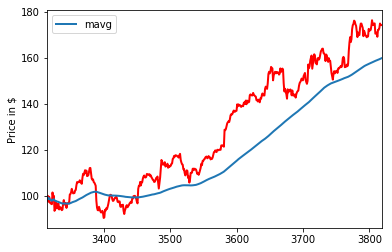

Loading BokehJS ...

In [6]:
sma1.createSMA(151)
sma1.plotSMA()

In [40]:
#Include more tests?

#checks normality of distribution make from closing price normalized to SMA
def checkNormality(sma_temp,window):
    sma_temp.createSMA(window)
    signals = sma_temp.getSMA()
    df2 = sma_temp.getDF()
    
    norm_data = df2['Close']-signals['mavg']
    
    #confidence level
    alpha = 0.001

    # null hypothesis: x comes from a normal distribution
    # null hypothesis rejection tracker: 0 -> fail to reject 1 -> reject
    tracker = []
    
    # D'Agostino normality test
    k2, p = stats.normaltest(norm_data)
    #print("p = {:g}".format(p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    
    # Shapiro normality test
    stat, p = shapiro(norm_data)
    #print('Statistics=%.5f, p=%.5f' % (stat, p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    return tracker, norm_data

largest window with normal distribution:  46


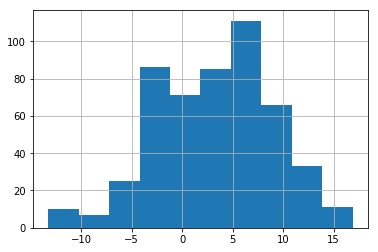

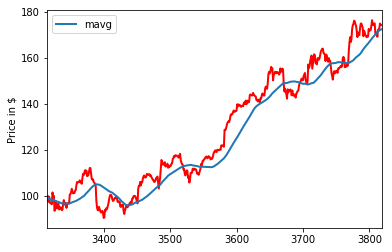

Loading BokehJS ...

In [8]:
#Make normal distribution; count down from 365 and select largest window that is normal
#If distribution passes both tests, we'll call that normal

found = False

for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
        
window = i

if found:
    print('largest window with normal distribution: ',window)
    norm_data.hist()
else:
    print('drop stock')
    print(window)
    
sma1.createSMA(window)
sma1.plotSMA()

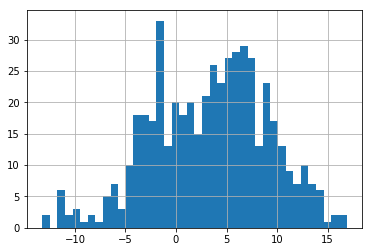

In [9]:
norm_data.hist(bins=40)

count    505.000000
mean       3.337742
std        5.732414
min      -13.241308
25%       -1.207141
50%        3.785436
75%        7.532607
max       16.874353
dtype: float64

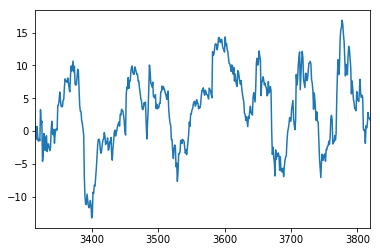

In [10]:
norm_data.plot()
norm_data.describe()

In [11]:
def buySignal(norm_data,sma_temp):
    #get normal distribution statistics
    ave = norm_data.describe()[1]
    low25 = norm_data.describe()[4]
    high75 = norm_data.describe()[6]
    
    #get moving average value for today
    mavg = sma_temp.getSMA()['mavg']
    today_sma = mavg.iloc[-1]
    
    #get today's price
    df = sma_temp.getDF()['Close']
    today_price = df.iloc[-1]
    
    #show data
    #print("today's price:\t\t",today_price)
    #print("expected value from sma: {:.4}".format(ave+today_sma))
    #print("expected 75% from sma:   {:.4}".format(high75+today_sma))
    
    #we want to buy if the price is > sma and < one standard deviation above the smagoing up past the average toward the 75% percentile
    if today_price > ave+today_sma and today_price < high75+today_sma:
        return "buy"
    else:
        return "Don't buy"

In [12]:
print(buySignal(norm_data,sma1))

Don't buy


In [13]:
#group each step together
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = dataStream.getData(ticker,start,end)
#print(df.tail())
#print(df.head())

#make sma
Sma = sma(df,ticker)
guess = 20
Sma.createSMA(guess)

#Make normal distribution; count down from 365/ and select largest window that is normal
#If distribution passes both tests, we'll call that normal
found = False
for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
window = i
if found:
    print('largest window with normal distribution: ',window)
else:
    print('window:',window)
sma1.createSMA(window)
print(buySignal(norm_data,sma1))

largest window with normal distribution:  46
Don't buy


Test effectiveness of model. Measure of effectiveness: shortest number of days until 5% profit (or greater). If signal returns -99, the buy (as of today) would not have returned 5%
1. Move through dates (365 day window, one day at a time (earliest day in data would be "yesterday")
2. Generate buy signal for "today"
3. If buy signal, search "future" days until price is greater than 5% "yesterday" (assuming that's close to what we would have bought at "today")
4. If 5% gain is reached, store number of days to get there
5. If 5% gain never reached, return -99 as error code


In [16]:
def daysUntilGains(yesterday,df):
    gain = 1.05
    price = df.loc[yesterday.strftime("%Y-%m-%d")]['Close']
    df_higherprices = df.loc[df['Close'] > price*gain]
        
    if df_higherprices.empty:
        print('no higher prices, no profit')
        return -99
    else:
        #print(df_higherprices.head(1).index[0].to_pydatetime().strftime("%Y-%m-%d"))
        delta = df_higherprices.head(1).index[0].to_pydatetime() - yesterday
        return delta.days

In [24]:
#some hyperparameters and data importing
epochs = 100
ticker = 'MSFT'
start = datetime.datetime(2015, 1, 10)
end = datetime.datetime(2018,1,10)
df_master = dataStream.getData(ticker,start,end)

In [33]:
df_master.head()

Unnamed: 0  Unnamed: 0.1        Date        Open        High  \
3064        3064          3064  2015-01-12  112.599998  112.629997   
3065        3065          3065  2015-01-13  111.430000  112.800003   
3066        3066          3066  2015-01-14  109.040001  110.489998   
3067        3067          3067  2015-01-15  110.000000  110.059998   
3068        3068          3068  2015-01-16  107.029999  107.580002   

             Low       Close   Adj Close    Volume  
3064  108.800003  109.250000  102.244522  49650800  
3065  108.910004  110.220001  103.152313  67091900  
3066  108.500000  109.800003  102.759262  48337000  
3067  106.660004  106.820000   99.970337  60014000  
3068  105.199997  105.989998   99.193558  78513300

In [41]:
buySignals = []
daysUntilProfit = []
for j in range(epochs):    
    #adjust time period
    daysBack = datetime.timedelta(days=epochs-j)
    start = datetime.datetime(2015, 1, 10) - daysBack
    yesterday = datetime.datetime(2018,1,10) - daysBack
    
    #adjust data set for new time frame
    df = df_master[df_master['Date'] >= start.strftime("%Y-%m-%d")]
    df = df[df['Date'] <= yesterday.strftime("%Y-%m-%d")]
    
    #initialize sma
    Sma = sma(df,ticker)

    #Make normal distribution; count down from 365 and select largest window that is normal
    found = False
    for i in range(365,9,-1): #check windows from 365 to 10
        reject, norm_data = checkNormality(Sma,i)
        if sum(reject) == 0:
            found = True
            break
    window = i
    if not found:
        print('rejected',yesterday.strftime("%Y-%m-%d"))
        continue #skip to next iteration in for loop if window is <= 10 or is rejected by normality tests
    
    #create sma on best normal window
    Sma.createSMA(window)
    
    #convert signal into 1 or 0. If buy, signal 1
    if(buySignal(norm_data,Sma)=="buy"):
        buySignals.append(1)
        #find future 5% gains
        days = daysUntilGains(yesterday,df_master.loc[yesterday.strftime("%Y-%m-%d"):])
        daysUntilProfit.append([days,yesterday])
    else:
        buySignals.append(0)

rejected 2017-10-02 00:00:00
rejected 2017-10-03 00:00:00
rejected 2017-10-04 00:00:00
rejected 2017-10-05 00:00:00
rejected 2017-10-06 00:00:00
rejected 2017-10-07 00:00:00
rejected 2017-10-08 00:00:00
rejected 2017-10-09 00:00:00
rejected 2017-10-10 00:00:00
rejected 2017-10-11 00:00:00
rejected 2017-10-12 00:00:00
rejected 2017-10-13 00:00:00
rejected 2017-10-14 00:00:00
rejected 2017-10-15 00:00:00
rejected 2017-10-16 00:00:00
rejected 2017-10-17 00:00:00
rejected 2017-10-18 00:00:00
rejected 2017-10-19 00:00:00
rejected 2017-10-20 00:00:00
rejected 2017-10-21 00:00:00
rejected 2017-10-22 00:00:00
rejected 2017-10-23 00:00:00
rejected 2017-10-24 00:00:00
rejected 2017-10-25 00:00:00
rejected 2017-10-26 00:00:00
rejected 2017-10-27 00:00:00
rejected 2017-10-28 00:00:00
rejected 2017-10-29 00:00:00
rejected 2017-10-30 00:00:00
rejected 2017-10-31 00:00:00
rejected 2017-11-01 00:00:00
rejected 2017-11-02 00:00:00
rejected 2017-11-03 00:00:00
rejected 2017-11-04 00:00:00
rejected 2017-

KeyError: 'the label [2017-11-29] is not in the [index]'

In [42]:
sum(buySignals)

1

In [43]:
daysUntilProfit

[]